"""
@author: Morten Haubro
@contributors: Morten Haubro, Asmus Ougaard Dohn
"""

In [14]:
%load_ext autoreload
%autoreload 2

from stacking import create_bins, bin_data_into_stack
from stacking import create_bins,bin_data_into_stack_2D
from calculating_diff_2D import test_offset_angle
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#range_to_check = [178,179,180,182,183,184,185,188,189,191,193,205,207] # 208,210 # DMA # 181,,187,
#offset_to_chose = 2247.3 # DMA

#range_to_check = [135,136,138,139,140,141]#range(138,144) #MeOH
#offset_to_chose = 2250.2 # MeOH

range_to_check = range(89,102) # H20
range_to_check = [*range_to_check, 106]

#range_to_check = range(89,93)
offset_to_chose = 2250.4


In [16]:
bins, counter = create_bins(range_to_check, t_0_offset=offset_to_chose, minimal_bin_time=0.01)

total delays: 69690
bins created:  174 , bins rejected:  71 , final bins:  103


(-1.0, 5.0)

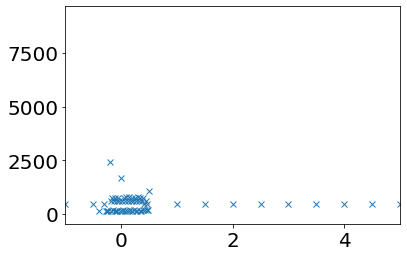

In [17]:
plt.plot(bins,counter,"x")
plt.xlim(-1,5)
#bins

In [19]:
#bins above t0
import numpy as np
np.where(np.asarray(bins) > 0.02)[0][0]

18

In [21]:
data_s, q = bin_data_into_stack_2D(bins[18:20],range_to_check, counter, t_0_offset=offset_to_chose,returnImage=True)

starting bin  0  out of  2
indexes here:  152
indexes here:  0
indexes here:  153
indexes here:  153


In [22]:
np.shape(data_s)

(512, 17)

In [23]:
angleList, S2_list = test_offset_angle(data_s)

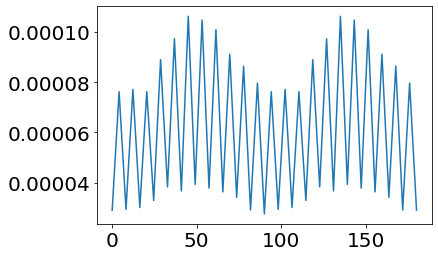

In [25]:
plt.plot(angleList, S2_list)

In [ ]:
data_dec, q = bin_data_into_stack_2D(bins,range_to_check, counter, t_0_offset=offset_to_chose)

starting bin  0  out of  103
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  678
indexes here:  611
indexes here:  0
indexes here:  0
indexes here:  846
indexes here:  450
indexes here:  0
starting bin  1  out of  103
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  321
indexes here:  326
indexes here:  0
indexes here:  0
indexes here:  323
indexes here:  311
indexes here:  0
starting bin  2  out of  103
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  325
indexes here:  328
indexes here:  0
indexes here:  0
indexes here:  326
indexes here:  1
indexes here:  0
starting bin  3  out of  103
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  0
indexes here:  325
indexes he

In [19]:
import numpy as np
np.shape(data_dec)

(103, 3, 512)

Text(0.5, 1.0, '$\\Delta S_2$ H20')

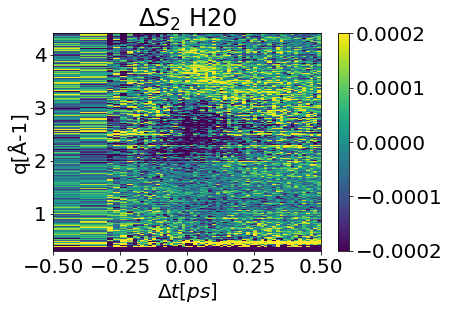

In [42]:
lim = 0.0002
plt.pcolor(bins,q,data_dec[:,2,:].T, vmin =-lim, vmax = lim)
plt.xlim(-0.5,0.5)
plt.colorbar()
plt.ylim(0.3,4.4)
plt.xlabel("$\Delta t [ps]$")
plt.ylabel("q[Å-1]")
plt.title("$\Delta S_2$ H20")

In [47]:
from scipy.io import savemat
import numpy as np
dict_to_save2 = {}
dict_to_save2["Sazi"] = data_dec[:-1,0,~np.isnan(data_dec[0,0,:])].T
dict_to_save2["S0"] = data_dec[:-1,1,~np.isnan(data_dec[0,0,:])].T #* np.nan
dict_to_save2["S2"] = data_dec[:-1,2,~np.isnan(data_dec[0,0,:])].T #* np.nan
dict_to_save2['q'] = q[~np.isnan(data_dec[0,0,:])]
dict_to_save2['scanvar'] = bins[:-1]
dict_to_save2['delay_motor'] = -np.asarray(bins[:-1])+offset_to_chose 
#savemat("/gpfs/exfel/u/scratch/FXE/202201/p002787/Diffs/stack_178_207_DMA_decomposed.mat", dict_to_save2) 
#savemat("/gpfs/exfel/u/scratch/FXE/202201/p002787/Diffs/stack_138_144_MeOH.mat", dict_to_save)
savemat("/gpfs/exfel/u/scratch/FXE/202201/p002787/Diffs/stack_89_106_H20_decomposed_delaymotor.mat", dict_to_save2) 
print('saved')

saved


In [46]:
-np.asarray(bins[:-1])+offset_to_chose 

array([2350.4  , 2340.268, 2330.05 , 2320.034, 2309.821, 2299.716,
       2286.232, 2281.014, 2275.806, 2270.4  , 2265.898, 2260.722,
       2258.636, 2257.626, 2255.529, 2254.51 , 2253.476, 2252.414,
       2251.4  , 2250.901, 2250.8  , 2250.7  , 2250.675, 2250.65 ,
       2250.625, 2250.6  , 2250.586, 2250.575, 2250.558, 2250.544,
       2250.53 , 2250.516, 2250.502, 2250.488, 2250.475, 2250.463,
       2250.45 , 2250.432, 2250.418, 2250.408, 2250.39 , 2250.376,
       2250.362, 2250.35 , 2250.334, 2250.32 , 2250.306, 2250.292,
       2250.278, 2250.264, 2250.25 , 2250.236, 2250.225, 2250.208,
       2250.194, 2250.18 , 2250.166, 2250.152, 2250.138, 2250.125,
       2250.11 , 2250.1  , 2250.082, 2250.068, 2250.054, 2250.04 ,
       2250.026, 2250.012, 2250.   , 2249.984, 2249.97 , 2249.956,
       2249.942, 2249.928, 2249.914, 2249.9  , 2249.4  , 2248.9  ,
       2248.4  , 2247.9  , 2247.4  , 2246.9  , 2246.4  , 2245.9  ,
       2245.405, 2244.902, 2244.4  , 2243.9  , 2243.4  , 2242.

In [100]:
data, q = bin_data_into_stack(bins,range_to_check, counter, t_0_offset=offset_to_chose)

starting bin  0  out of  183
starting bin  1  out of  183
starting bin  2  out of  183
starting bin  3  out of  183
starting bin  4  out of  183
starting bin  5  out of  183
starting bin  6  out of  183
starting bin  7  out of  183
starting bin  8  out of  183
starting bin  9  out of  183
starting bin  10  out of  183
starting bin  11  out of  183
starting bin  12  out of  183
starting bin  13  out of  183
starting bin  14  out of  183
starting bin  15  out of  183
starting bin  16  out of  183
starting bin  17  out of  183
starting bin  18  out of  183
starting bin  19  out of  183
starting bin  20  out of  183
starting bin  21  out of  183
starting bin  22  out of  183
starting bin  23  out of  183
starting bin  24  out of  183
starting bin  25  out of  183
starting bin  26  out of  183
starting bin  27  out of  183
starting bin  28  out of  183
starting bin  29  out of  183
starting bin  30  out of  183
starting bin  31  out of  183
starting bin  32  out of  183
starting bin  33  ou

In [101]:
from scipy.io import savemat
import numpy as np
dict_to_save = {}
dict_to_save["Sazi"] = data[:-1,~np.isnan(data[0,:])].T
dict_to_save["S0"] = data[:-1,~np.isnan(data[0,:])].T * np.nan
dict_to_save["S2"] = data[:-1,~np.isnan(data[0,:])].T * np.nan
dict_to_save['q'] = q[~np.isnan(data[0,:])]
dict_to_save['scanvar'] = bins[:-1]
savemat("/gpfs/exfel/u/scratch/FXE/202201/p002787/Diffs/stack_178_207_DMA.mat", dict_to_save) 
#savemat("/gpfs/exfel/u/scratch/FXE/202201/p002787/Diffs/stack_138_144_MeOH.mat", dict_to_save)
#savemat("/gpfs/exfel/u/scratch/FXE/202201/p002787/Diffs/stack_89_106_H20.mat", dict_to_save) 
print('saved')

saved


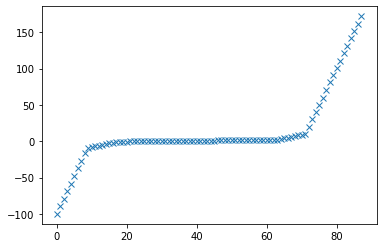

In [44]:
plt.plot(bins[:-1],'x')

(-1.0, 20.0)

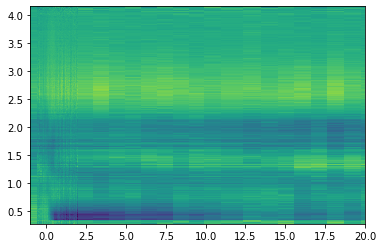

In [59]:
plt.pcolor(bins[:-1], dict_to_save['q'],dict_to_save["Sazi"])
plt.xlim(-1,20)

In [35]:
range_to_check

[178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 191, 193, 205, 207]